In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from music21 import *

In [3]:
centones = pd.read_csv("centones.csv")
centones

,#al-istihlal,#iraq al-arab,#al-maya,#al-sika,#garibat al-husayn
0,"E, F, G","E, F, G","B-, A, G","C, D, E","F, E, D"
1,"G, F, E","C, D, E","E, F, G","A, G","E, F, G"
2,"C, B, A, G","F, E, D, C","B, D, C","E, F, G","A, G"
3,"A, G","A, G","A, G","G, E","G, E"
4,"E, D","D, C","C, E","G, A","B, C, D"
5,"F, E","C, D","B, C","E, F, D, E","B, D, C, B, A"
6,"G, F","A, B, C","G, F, E","E, D, C","E, D, C"
7,"E, F, A, G","F, E","F, G, E, F, E, D, C","G, F, E","C, D, E"
8,"F, E, D",NaN,NaN,NaN,"G, F, E"
9,"A, B, C",NaN,NaN,NaN,"E, F, D, E"


In [21]:
lookup = {tab : [stream.Stream() for i in range(centones[tab].count())] for tab in centones.columns }
for tab in centones.columns:
    for i in range(centones[tab].count()):
        lookup[tab][i].append([note.Note(j) for j in centones[tab][i].split(", ")])

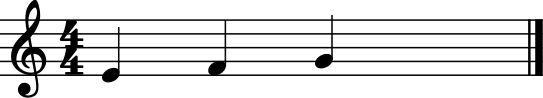

In [24]:
lookup['#al-istihlal'][0].show()

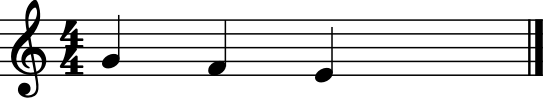

In [29]:
lookup['#al-sika'][7].show()

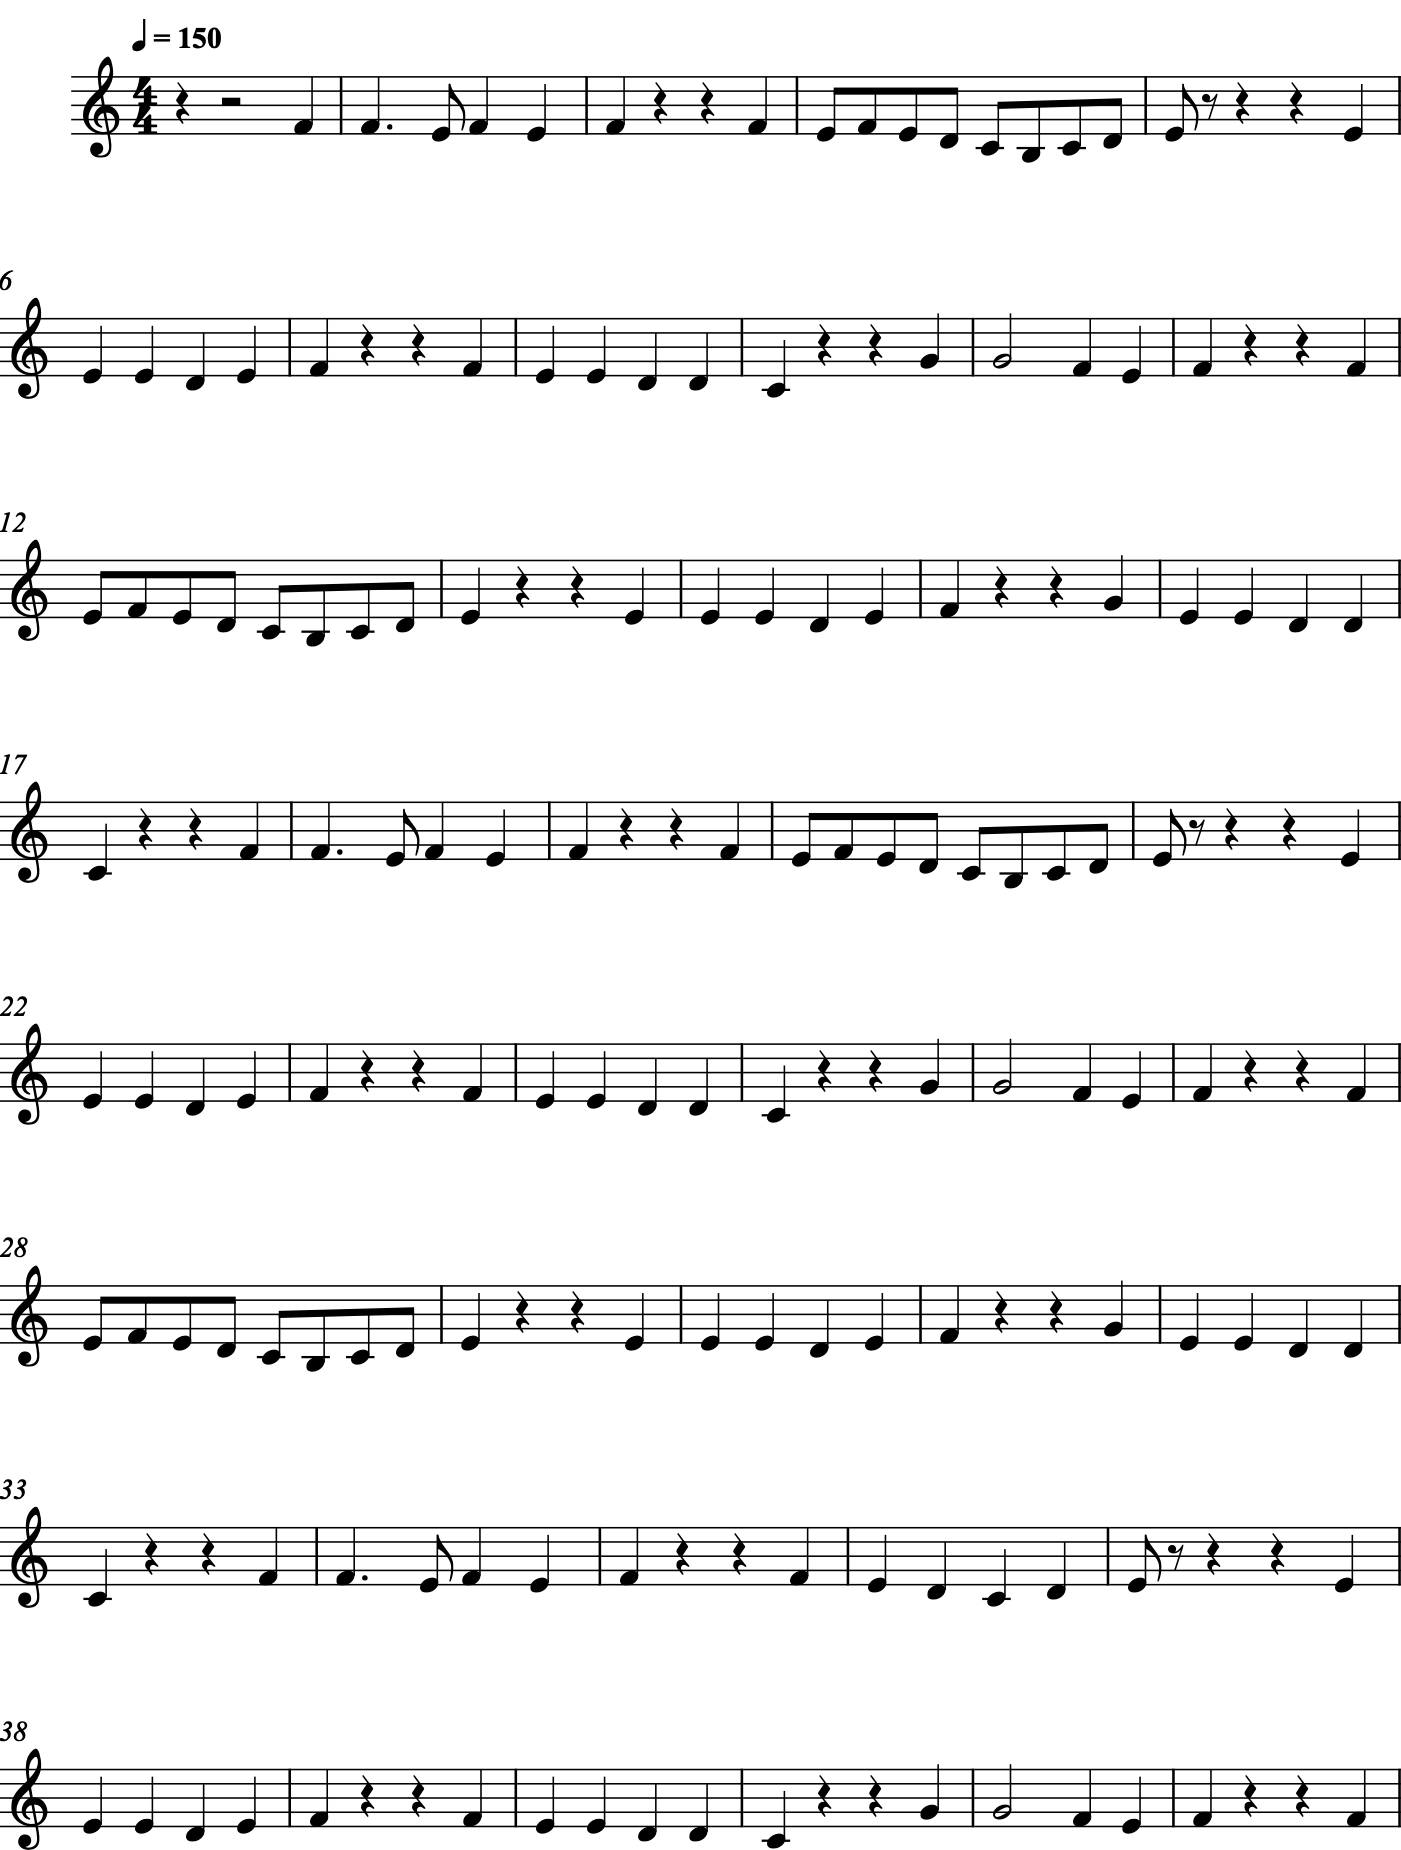

In [55]:
music = converter.parse("1ab3fe6b-0f46-4584-9abc-733d59c25c1b.xml")
#music.show()
full_piece_stream = music.recurse().notes
numoccur = pd.DataFrame([[len(search.noteNameSearch(full_piece_stream, motif)) for motif in lookup[tab]]for tab in centones.columns]).T
numoccur.columns = centones.columns

In [56]:
numoccur

,#al-istihlal,#iraq al-arab,#al-maya,#al-sika,#garibat al-husayn
0,14.0,14.0,0.0,28.0,29.0
1,15.0,28.0,14.0,0.0,14.0
2,0.0,29.0,0.0,14.0,0.0
3,0.0,0.0,0.0,11.0,11.0
4,85.0,56.0,0.0,0.0,6.0
5,97.0,28.0,7.0,0.0,0.0
6,15.0,0.0,15.0,29.0,29.0
7,0.0,97.0,0.0,15.0,28.0
8,29.0,NaN,NaN,NaN,15.0
9,0.0,NaN,NaN,NaN,0.0


<AxesSubplot:title={'center':'num occurences of centones by tab'}>

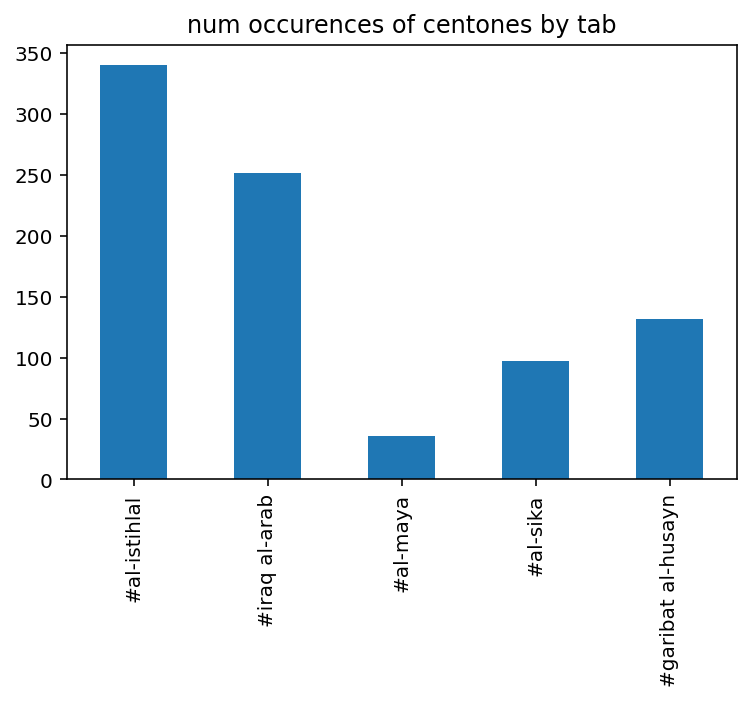

In [66]:
numoccur.sum().plot(title="num occurences of centones by tab",kind='bar')

<BarContainer object of 12 artists>

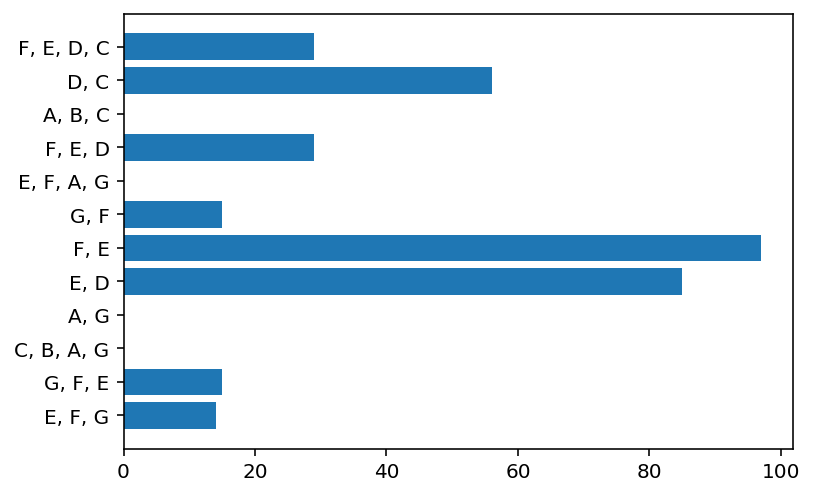

In [65]:
plt.barh(y=centones['#al-istihlal'].values, width=numoccur['#al-istihlal'].values)

In [67]:
import glob

In [74]:
file = glob.glob('/Users/samuelnarvaez/Downloads/ArabAndalusianDataset/*/*.xml')

In [75]:
file

[]